In [111]:
!git clone https://github.com/nazianafis/Brain-MRI-Classification.git

fatal: destination path 'Brain-MRI-Classification' already exists and is not an empty directory.


In [112]:
# Import libraries

import os
import random
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img,ImageDataGenerator, array_to_img
from tensorflow.keras.applications import EfficientNetB1

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten,Dense,Conv2D,Dropout,GlobalAveragePooling2D

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
import imutils    

In [113]:
# import os

# Create Directory for Training Data
base_dir = "C:\\users\\ayesh\\traning-Brain-MRI"

os.mkdir(base_dir)
os.mkdir(os.path.join(base_dir, "glioma_tumor"))
os.mkdir(os.path.join(base_dir, "meningioma_tumor"))
os.mkdir(os.path.join(base_dir, "no_tumor"))
os.mkdir(os.path.join(base_dir, "pituitary_tumor"))


FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'C:\\users\\ayesh\\traning-Brain-MRI'

In [114]:
import os

# Create Directory for Testing Data
base_dir = "C:\\users\\ayesh\\Test-Brain-MRI"

os.mkdir(base_dir)
os.mkdir(os.path.join(base_dir, "glioma_tumor"))
os.mkdir(os.path.join(base_dir, "meningioma_tumor"))
os.mkdir(os.path.join(base_dir, "no_tumor"))
os.mkdir(os.path.join(base_dir, "pituitary_tumor"))


FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'C:\\users\\ayesh\\Test-Brain-MRI'

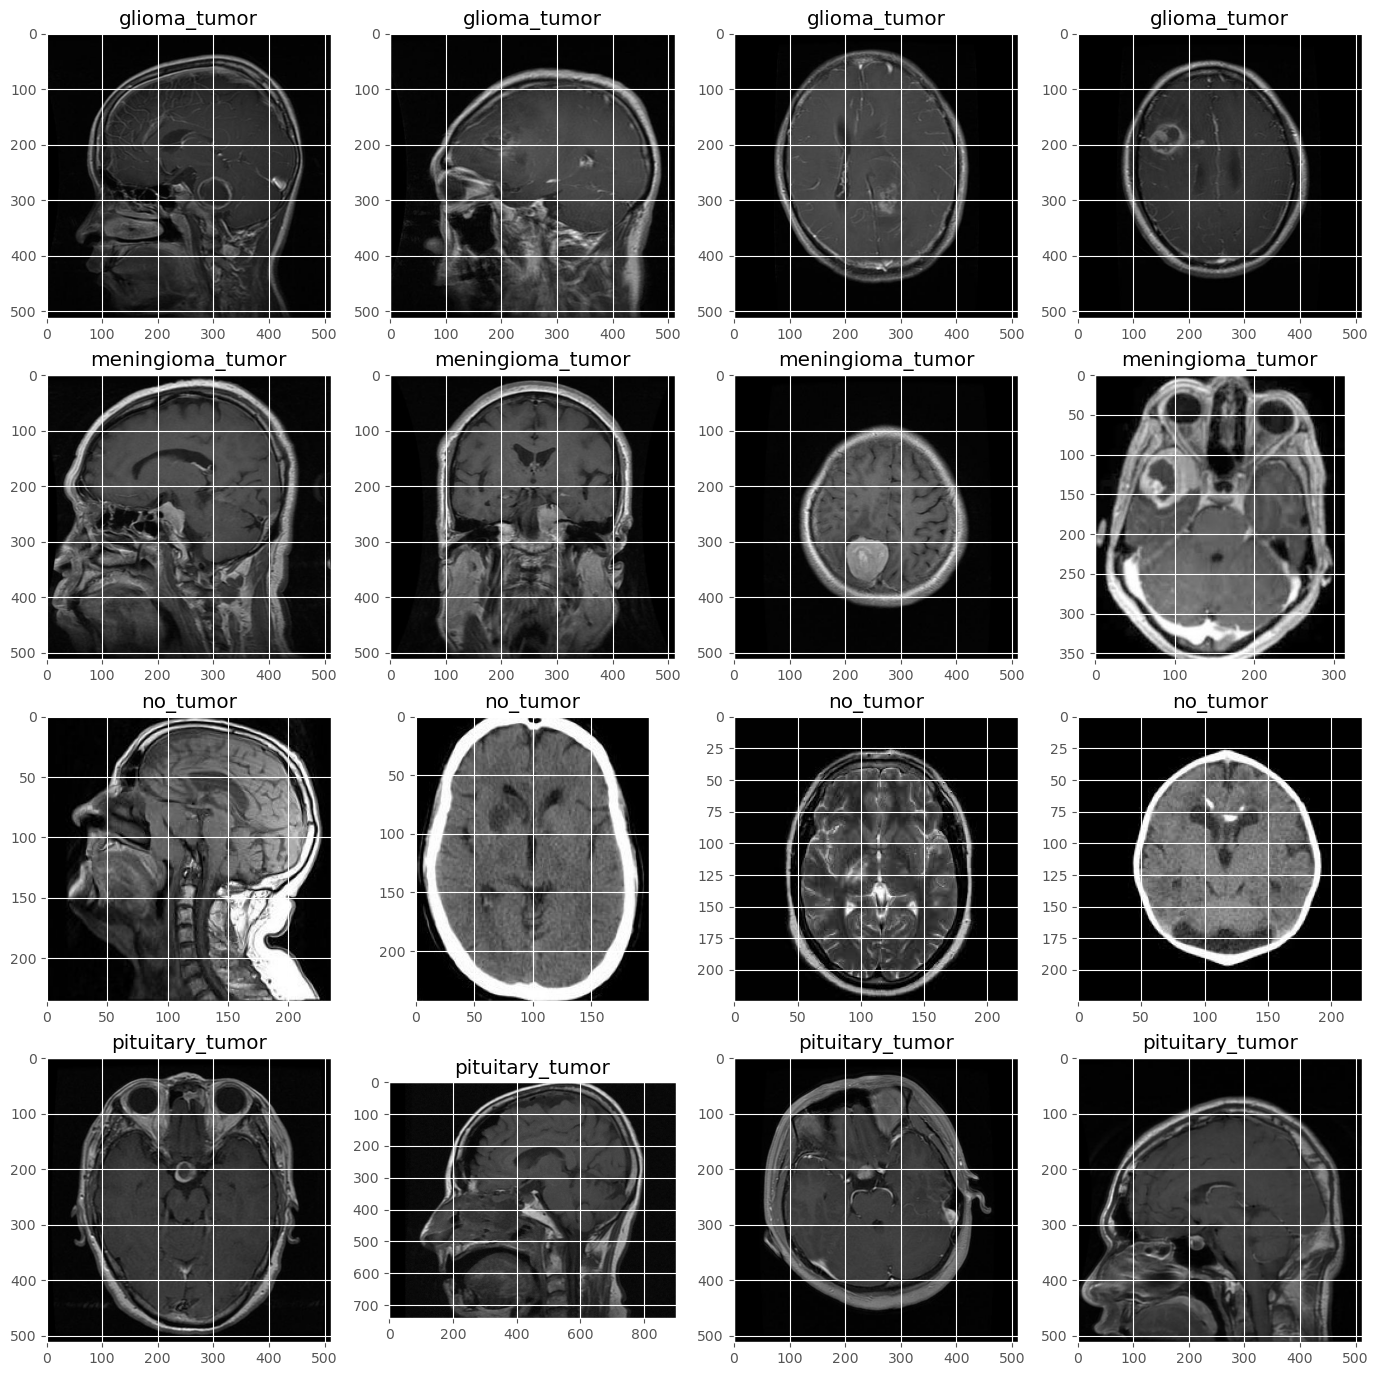

In [115]:
# Data Visualisation

train_dir = "C:\\users\\ayesh\\Brain-MRI-Classification/Brain-MRI/Training/"
test_dir = "C:\\users\\ayesh\\Brain-MRI-Classification/Brain-MRI/Testing/"

classes = os.listdir("C:\\users\\ayesh\\Brain-MRI-Classification/Brain-MRI/Training")

files_path_dict = {}

for c in classes:
  files_path_dict[c] = list(map(lambda x :train_dir+c+'/'+x, os.listdir(train_dir+c)))

plt.figure(figsize=(17,17))
index = 0

for c in classes:
  random.shuffle(files_path_dict[c])
  path_list = files_path_dict[c][:5]

  for i in range (1,5):
    index += 1
    plt.subplot(4, 4, index)
    plt.imshow(load_img(path_list[i]))
    plt.title(c)

In [116]:
def crop_image(image, plot=False):
    
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    img_gray = cv2.GaussianBlur(img_gray, (5, 5), 0)
    
    img_thresh = cv2.threshold(img_gray, 45, 255, cv2.THRESH_BINARY)[1]
    img_thresh = cv2.erode(img_thresh, None, iterations=2)
    img_thresh = cv2.dilate(img_thresh, None, iterations=2)

    contours = cv2.findContours(img_thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = imutils.grab_contours(contours)
    c = max(contours, key=cv2.contourArea)

    extLeft = tuple(c[c[:, :, 0].argmin()][0])
    extRight = tuple(c[c[:, :, 0].argmax()][0])
    extTop = tuple(c[c[:, :, 1].argmin()][0])
    extBot = tuple(c[c[:, :, 1].argmax()][0])
    
    new_image = image[extTop[1]:extBot[1], extLeft[0]:extRight[0]]            

    if plot:
        plt.figure()
        plt.subplot(1, 2, 1)
        plt.imshow(image)
        plt.tick_params(axis='both', which='both', top=False, bottom=False, left=False, right=False,labelbottom=False, labeltop=False, labelleft=False, labelright=False)
        plt.title('Original Image')
        plt.subplot(1, 2, 2)
        plt.imshow(new_image)
        plt.tick_params(axis='both', which='both',top=False, bottom=False, left=False, right=False,labelbottom=False, labeltop=False, labelleft=False, labelright=False)
        plt.title('Cropped Image')
        plt.show()
    
    return new_image

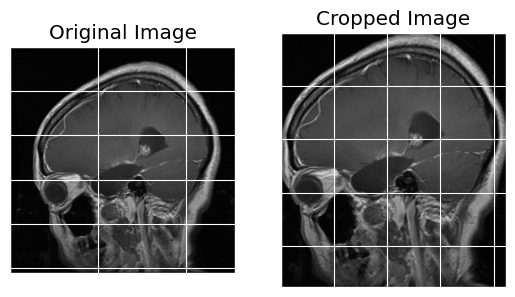

In [117]:
# Check the crop

example_img = cv2.imread("C:\\users\\ayesh/Brain-MRI-Classification/Brain-MRI/Training/glioma_tumor/gg (101).jpg")
cropped_image_example = crop_image(example_img, plot=True)

In [118]:
glioma = train_dir + "glioma_tumor"
meningioma = train_dir + "meningioma_tumor"
no_tumor = train_dir + "no_tumor"
pituitary = train_dir + "pituitary_tumor"

j = 0
for i in tqdm(os.listdir(glioma)):
  path = os.path.join(glioma, i)
  img = cv2.imread(path)
  img = crop_image(img, plot=False)
  if img is not None:
    img = cv2.resize(img, (224, 224))
    save_path = "C:\\users\\ayesh/Crop-Brain-MRI/glioma_tumor/"+ str(j) + ".jpg"
    cv2.imwrite(save_path, img)
    j = j+1

j = 0
for i in tqdm(os.listdir(meningioma)):
  path = os.path.join(meningioma, i)
  img = cv2.imread(path)
  img = crop_image(img, plot=False)
  if img is not None:
    img = cv2.resize(img, (224, 224))
    save_path = "C:\\users\\ayesh/Crop-Brain-MRI/meningioma_tumor/" +str(j) +".jpg"
    cv2.imwrite(save_path, img)
    j = j+1

j = 0
for i in tqdm(os.listdir(no_tumor)):
  path = os.path.join(no_tumor, i)
  img = cv2.imread(path)
  img = crop_image(img, plot=False)
  if img is not None:
    img = cv2.resize(img, (224,224))
    save_path = "C:\\users\\ayesh/Crop-Brain-MRI/no_tumor/"+str()+".jpg"
    cv2.imwrite(save_path, img)
    j = j+1

j = 0
for i in tqdm(os.listdir(pituitary)):
  path = os.path.join(pituitary, i)
  img = cv2.imread(path)
  img = crop_image(img, plot=False)
  if img is not None:
    img = cv2.resize(img, (224,224))
    save_path = "/content/Crop-Brain-MRI/pituitary_tumor/"+str()+".jpg"
    cv2.imwrite(save_path, img)
    j = j + 1

100%|███████████████████████████████████████████████████████████████████████████████| 901/901 [00:04<00:00, 225.07it/s]


In [119]:
# Crop the Testing Images and Save to respective directories
glioma = test_dir + "glioma_tumor"
meningioma = test_dir + "meningioma_tumor"
no_tumor = test_dir + "no_tumor"
pituitary = test_dir + "pituitary_tumor"

j = 0
for i in tqdm(os.listdir(glioma)):
  path = os.path.join(glioma, i)
  img = cv2.imread(path)
  img = crop_image(img, plot=False)
  if img is not None:
    img = cv2.resize(img, (224, 224))
    save_path = "C:\\users\\ayesh/Test-Brain-MRI/glioma_tumor/"+ str(j) + ".jpg"
    cv2.imwrite(save_path, img)
    j = j+1

j = 0
for i in tqdm(os.listdir(meningioma)):
  path = os.path.join(meningioma, i)
  img = cv2.imread(path)
  img = crop_image(img, plot=False)
  if img is not None:
    img = cv2.resize(img, (224, 224))
    save_path = "C:\\users\\ayesh/Test-Brain-MRI/meningioma_tumor/" +str(j) +".jpg"
    cv2.imwrite(save_path, img)
    j = j+1

j = 0
for i in tqdm(os.listdir(no_tumor)):
  path = os.path.join(no_tumor, i)
  img = cv2.imread(path)
  img = crop_image(img, plot=False)
  if img is not None:
    img = cv2.resize(img, (224,224))
    save_path = "C:\\users\\ayesh/Test-Brain-MRI/no_tumor/"+str()+".jpg"
    cv2.imwrite(save_path, img)
    j = j+1

j = 0
for i in tqdm(os.listdir(pituitary)):
  path = os.path.join(pituitary, i)
  img = cv2.imread(path)
  img = crop_image(img, plot=False)
  if img is not None:
    img = cv2.resize(img, (224,224))
    save_path = "C:\\users\\ayesh/Test-Brain-MRI/pituitary_tumor/"+str()+".jpg"
    cv2.imwrite(save_path, img)
    j = j + 1

100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 119.72it/s]


In [153]:
# Use Image Data Generator

datagen = ImageDataGenerator(rotation_range=10, height_shift_range=0.2, horizontal_flip=True, validation_split=0.2)
train_data = datagen.flow_from_directory('C:\\users\\ayesh/Crop-Brain-MRI/', target_size=(224,224), batch_size=32, class_mode='categorical', subset='training')

valid_data = datagen.flow_from_directory('C:\\users\\ayesh/Crop-Brain-MRI/', target_size=(224,224), batch_size=32, class_mode='categorical', subset='validation')

test_datagen = ImageDataGenerator()

test_data = datagen.flow_from_directory('C:\\users\\ayesh/Crop-Brain-MRI/', target_size=(224,224), class_mode='categorical')

Found 1492 images belonging to 4 classes.
Found 372 images belonging to 4 classes.
Found 1864 images belonging to 4 classes.


In [154]:
print(train_data.class_indices)
print(test_data.class_indices)

{'glioma_tumor': 0, 'meningioma_tumor': 1, 'no_tumor': 2, 'pituitary_tumor': 3}
{'glioma_tumor': 0, 'meningioma_tumor': 1, 'no_tumor': 2, 'pituitary_tumor': 3}


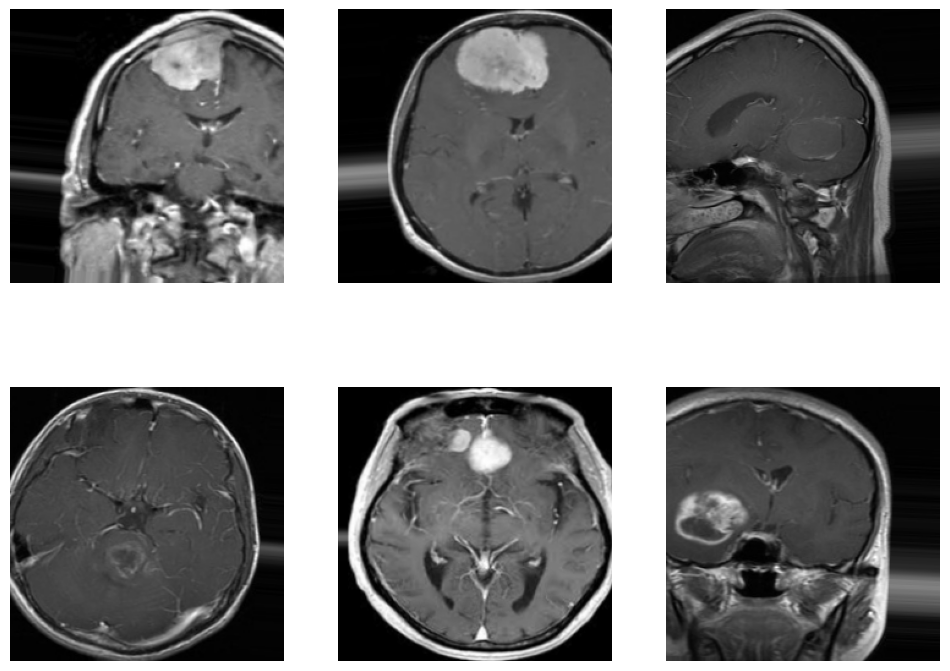

In [155]:
sample_x, sample_y =next(train_data)
plt.figure(figsize=(12,9))
for i in range (6):
  plt.subplot(2, 3, i+1)
  sample = array_to_img(sample_x[i])
  plt.axis('off')
  plt.grid(False)
  plt.imshow(sample)  
plt.show()

In [156]:
 #Build the Model

effnet = EfficientNetB1(weights="imagenet", include_top=False, input_shape=(224,224, 3))

model = effnet.output
model = GlobalAveragePooling2D()(model)
model = Dropout(0.5)(model)
model = Dense(4, activation="softmax")(model)
model = Model(inputs= effnet.input, outputs=model)

model.summary()

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_16 (Rescaling)       (None, 224, 224, 3)  0           ['input_9[0][0]']                
                                                                                                  
 normalization_8 (Normalization  (None, 224, 224, 3)  7          ['rescaling_16[0][0]']           
 )                                                                                                
                                                                                            

In [157]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])

checkpoint = ModelCheckpoint("model.h5", monitor="val_accuracy", save_best_only=True, mode="auto", verbose=1)

earlystop = EarlyStopping(monitor="val_accuracy", patience=5, mode="auto", verbose=1)


In [173]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set target size and batch size
target_size = (224, 224)
batch_size = 32

# Create ImageDataGenerator with rescaling and other augmentations if needed
datagen = ImageDataGenerator(rescale=1./255)  # You can add more augmentation parameters here

# Create generators for training and validation data
train_generator = datagen.flow_from_directory(
    directory='C:\\users\\ayesh/Crop-Brain-MRI/',
    target_size=target_size,
    batch_size=batch_size,
    class_mode='binary',  # Assuming binary classification
    shuffle=True
)

valid_generator = datagen.flow_from_directory(
    directory='C:\\users\\ayesh/Crop-Brain-MRI/',
    target_size=target_size,
    batch_size=batch_size,
    class_mode='binary',  # Assuming binary classification
    shuffle=False  # Keep validation data in order for evaluation
)

# Build a simple sequential model
model = Sequential()
model.add(Flatten(input_shape=(target_size[0], target_size[1], 3)))  # Adjust input shape based on your images
model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model using generators
history = model.fit(
    train_generator,
    epochs=27,
    validation_data=valid_generator,
    verbose=1,
    callbacks=[checkpoint, earlystop]
)



Found 1864 images belonging to 4 classes.
Found 1864 images belonging to 4 classes.
Epoch 1/27
59/59 [==============================] - ETA: 0s - loss: 3.0043 - accuracy: 0.5805
Epoch 1: val_accuracy did not improve from 0.95762
59/59 [==============================] - 9s 120ms/step - loss: 3.0043 - accuracy: 0.5805 - val_loss: 0.4962 - val_accuracy: 0.7591
Epoch 2/27
58/59 [============================>.] - ETA: 0s - loss: 0.8819 - accuracy: 0.6610
Epoch 2: val_accuracy did not improve from 0.95762
59/59 [==============================] - 7s 110ms/step - loss: 0.8875 - accuracy: 0.6599 - val_loss: 0.4081 - val_accuracy: 0.8208
Epoch 3/27
59/59 [==============================] - ETA: 0s - loss: 0.8127 - accuracy: 0.7135
Epoch 3: val_accuracy did not improve from 0.95762
59/59 [==============================] - 5s 93ms/step - loss: 0.8127 - accuracy: 0.7135 - val_loss: 0.4094 - val_accuracy: 0.8256
Epoch 4/27
59/59 [==============================] - ETA: 0s - loss: 0.6318 - accuracy: 0.

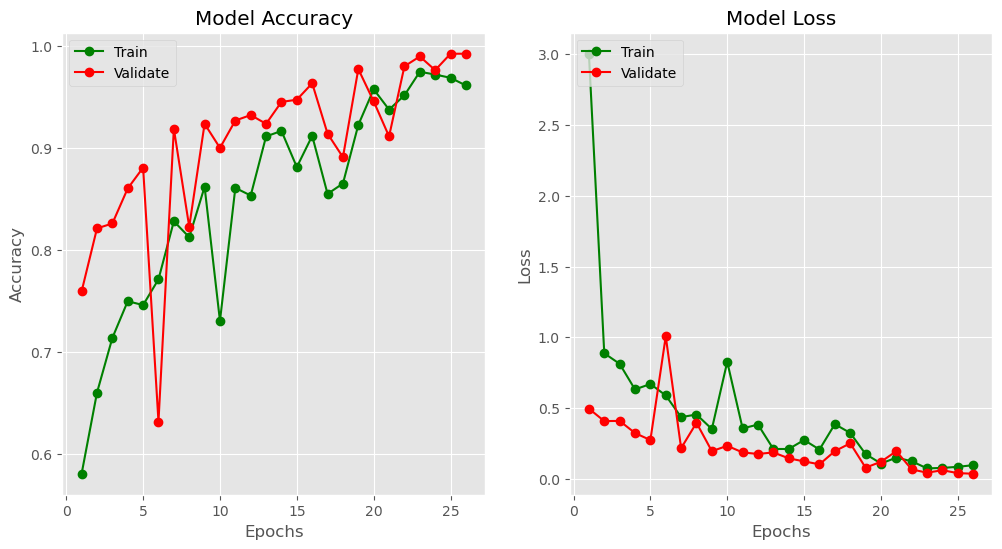

In [174]:
import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.figure(figsize=(12, 6))

epochs = range(1, 27)  # Adjust the range based on the length of your history data

plt.subplot(1, 2, 1)
plt.plot(epochs, history.history["accuracy"][:26], "go-")  # Use [:6] to match the length
plt.plot(epochs, history.history["val_accuracy"][:26], "ro-")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validate"], loc="upper left")

plt.subplot(1, 2, 2)
plt.plot(epochs, history.history["loss"][:26], "go-")
plt.plot(epochs, history.history["val_loss"][:26 ], "ro-")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train", "Validate"], loc="upper left")

plt.show()


In [175]:

# Evaluate the model on Test Set

model.evaluate(test_data)

59/59 [==============================] - 18s 284ms/step - loss: 7.4014 - accuracy: 0.5142


[7.401367664337158, 0.5142167210578918]

1/1 [==============================] - 1s 1s/step
glioma_tumor


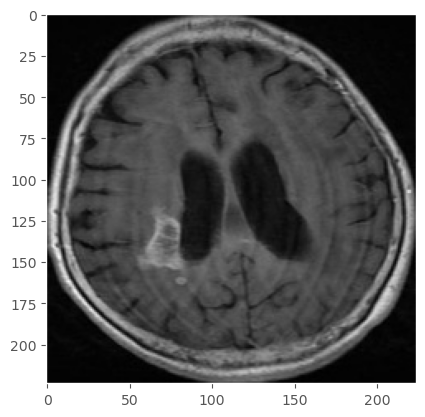

In [182]:
# Obtain Prediction on Test Image

class_dict = {0: "glioma_tumor", 1: "meningioma_tumor", 2: "no_tumor", 3: "pituitary_tumor"}

test_img1 = cv2.imread("C:\\users\\ayesh/Crop-Brain-MRI/glioma_tumor/123.jpg")

plt.imshow(test_img1)

plt.grid(False)

test_img1 = np.expand_dims(test_img1, axis=0)

pred = model.predict(test_img1)
pred = np.argmax(pred)
pred_class =class_dict[pred]
print(pred_class)